## Generate Dataset: ##

Generate bounding box groundtruth for object detection. An image consists of 17 vertebrae, each considered as different objects. Using the corner landmark-coordinates, bound each object with rectangular box. Every image will have 17 objects, each belonging to  different class (17 classes in total), with 4 bounding box coordinates for each object. This script will output a csv file with column headers as: <br/>``` [ image_name, xmin, ymin, xmax, ymax, label ] ```

Make sure to include a copy of the dataset in the root directory, the global structure should look like this:  
SpineCurvEst  
     |  
     |---- Jupyter_Notebooks  
     |           |  
     |           |---- generate_groundtruth.ipynb  (this current file)  
     |           |  
     |           |---- Test_codes.ipynb  
     |  
     |---- boostnet_labeldata  
     |             |  
     |             |---- data  
     |             |      |  
     |             |      |---- test  
     |             |      |      |  
     |             |      |     etc...  
     |             |      |  
     |             |      |---- training  
     |             |               |  
     |             |              etc...  
     |             |  
     |             |---- labels  
     |             |       |  
     |             |       |---- test  
     |             |       |      |  
     |             |       |     etc...  
     |             |       |  
     |             |       |---- training  
     |             |                |  
     |             |               etc...  
     |            etc...  
    etc...  

In [1]:
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


image shape: (1822, 842, 3)
329 43 139 65
341 107 129 86
361 197 111 63
344 270 117 79
322 341 126 86
301 418 131 92
280 499 126 85
267 585 121 79
259 674 134 70
261 762 132 77
271 849 146 102
295 947 149 113
329 1049 154 129
373 1161 172 130
414 1286 168 106
429 1409 178 104
422 1542 174 103
[141.58823529  92.29411765]


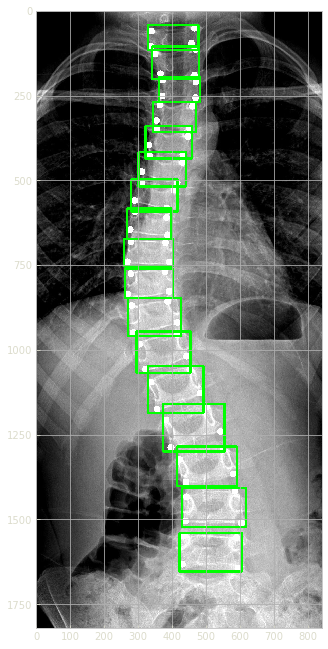

In [2]:
### visualize the bounding boxes

filename = "sunhl-1th-10-Jan-2017-254 A AP.jpg"
image_directory = "../boostnet_labeldata/data/training/"
label_directory = "../boostnet_labeldata/labels/training/"
image = image_directory + filename

img = cv2.imread(image)

data = pd.read_csv(label_directory+"landmarks.csv",header= None)
filename_labels = pd.read_csv(label_directory+"filenames.csv",header= None)

print ("image shape:",img.shape)
indx= filename_labels[filename_labels.iloc[:,0]== filename].index.tolist()
landmark= data.iloc[indx[0]].values
for m in range(0,68):
    cv2.circle(img,(int(img.shape[1]*landmark[m]),int(img.shape[0]*landmark[m+68])), 10, (255,255,255), -1)

landmark = [[int(round(img.shape[1]*landmark[m])),int(round(img.shape[0]*landmark[m+68]))] for m in range (0,68)]
#print (landmark)


N=4
corners = [landmark[n:n+N] for n in range(0, len(landmark), N)]
corners= np.array(corners)

avg=[]
for box in corners:
    x,y,w,h = cv2.boundingRect(box)
    cv2.rectangle(img,(x-10,y-10),(x+w+10,y+h+10),(0,255,0),5)
    avg.append((w+10,h+10))
    print (x-10,y-10,w+10,h+10)

print (np.mean(avg,axis=0))

plt.figure(1, figsize=(25,25))


plt.subplot(211)
plt.imshow(img[:,:,::-1])


### Save all the bounding boxes to visiualize

In [3]:
def visualize_all_bounding_box(image_directory, filenames_csv, landmarks_csv, save_path, split_type= 'training'):

    landmarks_data= pd.read_csv(landmarks_csv,header= None)
    filename_labels= pd.read_csv(filenames_csv,header= None)


    for i, names in enumerate(filename_labels.iloc[:,0]):

        img = cv2.imread(image_directory+names)
        print (image_directory+names)
        #print (names)
        #print ("image shape",img.shape)
        landmarks = landmarks_data.loc[i].values
        landmarks = [[int(round(img.shape[1]*landmarks[m])),int(round(img.shape[0]*landmarks[m+68]))] for m in range (0,68)]

        # group landmark coordinates, each group has 4 points that represents a vertebra
        N=4
        box = [landmarks[n:n+N] for n in range(0, len(landmarks), N)]
        #print (box)
        box = np.array(box)

        for c, box_coordinates in enumerate(box):
            x,y,w,h = cv2.boundingRect(box_coordinates)
            cv2.rectangle(img,(x-10,y-10),(x+w+10,y+h+10),(0,255,0),5)
        cv2.imwrite(save_path+split_type+'/'+names,img)


In [4]:
train_data_directory = "../boostnet_labeldata/data/training/"
#test_data_directory = "../boostnet_labeldata/data/test/"
train_label_directory = "../boostnet_labeldata/labels/training/"
#test_label_directory = "../boostnet_labeldata/labels/test/"
save_path = "Visualize boxes/"

### call make_csv function to create dataset in format supported by luminoth library
if not os.path.exists('Visualize boxes/training/'):
    os.makedirs('Visualize boxes/training/')
visualize_all_bounding_box(train_data_directory,train_label_directory + 'filenames.csv',
                           train_label_directory + 'landmarks.csv',save_path, 'training')

#if not os.path.exists('Visualize boxes/test/'):
#    os.makedirs('Visualize boxes/test/')
#visualize_all_bounding_box(test_data_directory,test_label_directory + 'filenames.csv'),
#                           test_label_directory + 'landmarks.csv'),save_path, 'test')


../boostnet_labeldata/data/training/sunhl-1th-02-Jan-2017-162 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-02-Jan-2017-162 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-03-Jan-2017-163 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-03-Jan-2017-163 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-03-Jan-2017-164 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-03-Jan-2017-165 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-04-Jan-2017-165 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-04-Jan-2017-165 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-05-Jan-2017-167 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-05-Jan-2017-167 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-05-Jan-2017-169 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-05-Jan-2017-170 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-05-Jan-2017-171 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-05-Jan-2017-172 A AP.jpg
../boo

In [7]:
def make_csv_bounding_box(image_directory, filenames_csv, landmarks_csv, split_type= 'training'):
    
    landmarks_data= pd.read_csv(landmarks_csv,header= None)
    filename_labels= pd.read_csv(filenames_csv,header= None)
    
    df= pd.DataFrame(columns=['image_id', 'xmin','ymin','xmax','ymax','label'])

    
    for i, names in enumerate(filename_labels.iloc[:,0]):

        img = cv2.imread(image_directory+names)
        print (names)
        #print ("image shape",img.shape)
        landmarks = landmarks_data.loc[i].values
        landmarks = [[int(round(img.shape[1]*landmarks[m])),int(round(img.shape[0]*landmarks[m+68]))] for m in range (0,68)]
        
        # group landmark coordinates, each group has 4 points that represents a vertebra
        N=4     
        box = [landmarks[n:n+N] for n in range(0, len(landmarks), N)]
        #print (box)
        box= np.array(box)
        
        for c, box_coordinates in enumerate(box):
            x,y,w,h = cv2.boundingRect(box_coordinates)
            if c < 12:
                df= df.append({'image_id': names, 'xmin': x-50, 'ymin': y-10, 
                               'xmax': x+w+50,'ymax':y+h+10, 'label':1}, ignore_index=True) # increase the area of bounding rectangle if required
            else:
                df= df.append({'image_id': names, 'xmin': x-50, 'ymin': y-10, 
                               'xmax': x+w+50,'ymax':y+h+10, 'label':2}, ignore_index=True) # increase the area of bounding rectangle if required
                
    csv_file = split_type + ".csv"
    df.to_csv(csv_file,index = False)

        
        

In [14]:
train_data_directory = "../boostnet_labeldata/data/training/"
test_data_directory = "../boostnet_labeldata/data/test/"
train_label_directory = "../boostnet_labeldata/labels/training/"
test_label_directory = "../boostnet_labeldata/labels/test/"

### call make_csv function to create dataset in format supported by luminoth library

make_csv_bounding_box(train_data_directory,train_label_directory + 'filenames.csv',
         train_label_directory + 'landmarks.csv', 'training')


make_csv_bounding_box(test_data_directory,test_label_directory + 'filenames.csv'),
         test_label_directory + 'landmarks.csv', 'test')



IndentationError: unexpected indent (<ipython-input-14-3705cb2b00d1>, line 13)

## Generate GroundTruth for Landmark Prediction from Patch ##
 Using each vertebra bounding-box, generate patch-image (1 image will generate 17 patch-images). Find landmark-groundtruth-coordinates (between 0 and 1) for each patch.Save the groundtruth and patches.

In [32]:
def make_csv_landmark(image_directory, filenames_csv, landmarks_csv, split_type= 'training'):
    
    landmarks_data= pd.read_csv(landmarks_csv,header= None)
    filename_labels= pd.read_csv(filenames_csv,header= None)
    
    df= pd.DataFrame(columns=['image_id', 'x1','y1','x2','y2','x3','y3','x4','y4'])

    
    for i, names in enumerate(filename_labels.iloc[:,0]):

        img = cv2.imread(image_directory+names)
        
        landmarks = landmarks_data.loc[i].values
        landmarks = [[int(round(img.shape[1]*landmarks[m])),int(round(img.shape[0]*landmarks[m+68]))] for m in range (0,68)]
        
        # group landmark coordinates, each group has 4 points that represents a vertebra
        N=4     
        box = [landmarks[n:n+N] for n in range(0, len(landmarks), N)]
        #print (box)
        box= np.array(box)
        
        
        for c, box_coordinates in enumerate(box):
            #print (box_coordinates)
            x_,y_,w_,h_ = cv2.boundingRect(box_coordinates)
            
            _increase_w = 50 #increase bounding box by certain pixels 
            _increase_h = 10
            
            # if increasing bounding box result in region outside the image,donot perform increment
            if (x_-_increase_w) <0 :
                _increase_w=0
            if (y_-_increase_h) <0 :
                _increase_h=0
            
            
            patch_image = crop_patch (img, x_,y_,w_,h_, increase_w=_increase_w, increase_h=_increase_h)

            adjusted_landmarks = adjust_landmarks_position(patch_image, box_coordinates, increase_w= _increase_w,
                                        increase_h= _increase_h ,x=x_,y=y_,w=w_, h= h_)
            
            
            patch_name = names.replace('.jpg', '')+'_'+str(c)+'.jpg' # filename for each patch
            #print ("For Patch: ",patch_name)
            
           
            #resized_patch= cv2.resize(patch_image,(200,120),interpolation=cv2.INTER_AREA) #resize the patches to a fixed size
            
            
            # create a dictionary to append into dataframe row
            adjusted_landmarks_ = adjusted_landmarks.ravel()
            adjusted_landmarks_ = np.append(adjusted_landmarks_,patch_name)
            keywords= ['x1','y1','x2','y2','x3','y3','x4','y4','image_id']
            adjusted_landmarks_dict= dict(zip(keywords,adjusted_landmarks_))
            
            
            #print (adjusted_landmarks_dict)
            
            ''''# for visualization of landmark
            adjusted_landmarks[:,0]= adjusted_landmarks[:,0]*resized_patch.shape[1]
            adjusted_landmarks[:,1]= adjusted_landmarks[:,1]*resized_patch.shape[0]
            
            
            for points in adjusted_landmarks:
                cv2.circle(resized_patch,(int(points[0]),int(points[1])), 3, (255,255,255), -1)
                print (points)'''
            
            save_path = split_type+'_patch_images/'
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            cv2.imwrite(save_path+patch_name, patch_image)
            
    
            df= df.append(adjusted_landmarks_dict, ignore_index=True) 
            
            
    csv_file= split_type+ '_patches_gnd'+ ".csv"
    df.to_csv(csv_file,index= False)

In [20]:
def adjust_landmarks_position (patch_image, box_coordinates,x,y,w,h, increase_w =10, increase_h= 10):
    
    box_coordinates = box_coordinates.astype(float)

    
    # re-adjust the landmark coordinates in relation to single patch
    box_coordinates[:,0]= (box_coordinates[:,0]-(x-increase_w))/ patch_image.shape[1]
    box_coordinates[:,1]= (box_coordinates[:,1]-(y-increase_h))/ patch_image.shape[0]
      
    return box_coordinates
        
    

In [21]:
def crop_patch(image, x,y,w,h, increase_w = 10, increase_h=10):
    img_copy= np.copy(image)
    patch_image = img_copy[y-increase_h:y+h+increase_h,x-increase_w:x+w+increase_w]
    return patch_image
    

### Run this to generate patch images for train and validation, and a correponding csv file with landmark position (groundtruth)

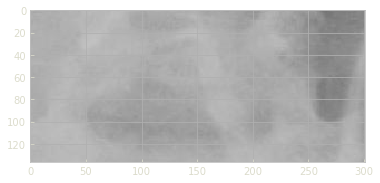

In [34]:
train_data_directory = "../boostnet_labeldata/data/training/"
test_data_directory = "../boostnet_labeldata/data/test/"
train_label_directory= "../boostnet_labeldata/labels/training/"
test_label_directory = "../boostnet_labeldata/labels/test/"


make_csv_landmark(train_data_directory,train_label_directory + 'filenames.csv',
         train_label_directory + 'landmarks.csv', 'training')


make_csv_landmark(test_data_directory,test_label_directory + 'filenames.csv',
         test_label_directory + 'landmarks.csv', 'test')

## Generate Ground Truth for Combined Landmarks detection ##

In [39]:
def generate_spine_image(image_directory, filenames_csv, landmarks_csv, save_path, split_type= 'train'):
    
    landmarks_data= pd.read_csv(landmarks_csv,header= None)
    filename_labels= pd.read_csv(filenames_csv,header= None)
    

    
    for i, names in enumerate(filename_labels.iloc[:,0]):

        img = cv2.imread(image_directory+names)
        print (names)
        #print ("image shape",img.shape)
        landmarks = landmarks_data.loc[i].values
        landmark = [[int(round(img.shape[1]*landmarks[m])),int(round(img.shape[0]*landmarks[m+68]))] for m in range (0,68)]

        # group 4 corner landmarks to form box
        N=4    
        landmark_corners = [landmark[n:n+N] for n in range(0, len(landmark), N)]
        landmark_corners= np.array(landmark_corners)
        boxes= []

        
        blank_image= np.zeros(img.shape,np.uint8)
        for box in landmark_corners:
            x,y,w,h = cv2.boundingRect(box)
            cv2.rectangle(blank_image,(x-50,y-50),(x+w+50,y+h+50),(255,255,255),-1)
    
        kernel = np.ones((10,10),np.uint8)
        dilated = cv2.dilate(blank_image,kernel,iterations = 5)
        
        
        masked_image = cv2.bitwise_and(img,dilated)
        masked = np.ma.array(data= img, mask= ~dilated.astype(bool))
        mean= np.mean(masked)
        print (mean)
        img[dilated==0]=mean
        if not os.path.exists(save_path+split_type):
                os.makedirs(save_path+split_type)
        cv2.imwrite(save_path+split_type+'/'+names,img)
        

       

sunhl-1th-02-Jan-2017-162 A AP.jpg
93.6940622123008
sunhl-1th-02-Jan-2017-162 B AP.jpg
104.38983152839232
sunhl-1th-03-Jan-2017-163 A AP.jpg
150.07260574986267
sunhl-1th-03-Jan-2017-163 B AP.jpg
132.5576298978238
sunhl-1th-03-Jan-2017-164 A AP.jpg
128.4344995219756
sunhl-1th-01-Mar-2017-310 C AP.jpg
113.44418981950923
sunhl-1th-01-Mar-2017-310 a ap.jpg
74.78372889420338
sunhl-1th-01-Mar-2017-311 A AP.jpg
136.32718566253186
sunhl-1th-01-Mar-2017-311 C AP.jpg
121.23013290863243
sunhl-1th-01-Mar-2017-311 D AP.jpg
135.27795945744003


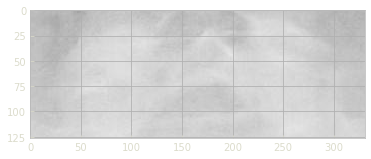

In [40]:
train_data_directory = "../boostnet_labeldata/data/training/"
test_data_directory = "../boostnet_labeldata/data/test/"
train_label_directory = "../boostnet_labeldata/labels/training/"
vatest_label_directory = "../boostnet_labeldata/labels/test/"
save_path='groundtruth for 68 landmarks detection/' 

make_csv_landmark(train_data_directory,train_label_directory + 'filenames.csv',
         train_label_directory + 'landmarks.csv', 'training')

generate_spine_image(train_data_directory,train_label_directory + 'filenames.csv',
         train_label_directory + 'landmarks.csv', save_path,'training')


generate_spine_image(test_data_directory,test_label_directory + 'filenames.csv',
         test_label_directory + 'landmarks.csv', save_path,'test')